In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [2]:
df = pd.read_csv(os.path.join("train_80.csv"))


In [3]:
dogs = df[ df['Type'] == 1 ].index 
df.drop(dogs, inplace = True) 
df.shape

(6861, 25)

In [4]:
y = df["AdoptionSpeed"]

In [5]:
# Model 1
## k=15 Test Accuracy: 0.322
X = df[['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2', 'Color3','MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee', 'VideoAmt', 'PhotoAmt']]
X.shape

(6861, 18)

In [15]:
# Model #2 - Dropping Breed 2, Color 2&3, Qty
## k=15 Test Accuracy: 0.334

X = df[['Type', 'Age', 'Breed1', 'Gender', 'Color1', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee', 'VideoAmt', 'PhotoAmt']]
X.head(3)

,Type,Age,Breed1,Gender,Color1,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,VideoAmt,PhotoAmt
0,2,3,299,1,1,1,1,2,2,2,1,1,100,0,1
1,2,1,265,1,1,2,2,3,3,3,1,1,0,0,2
5,2,3,266,2,5,2,1,2,2,2,1,1,0,0,2


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

k: 1, Train/Test Score: 0.954/0.311
k: 3, Train/Test Score: 0.597/0.304
k: 5, Train/Test Score: 0.528/0.321
k: 7, Train/Test Score: 0.491/0.330
k: 9, Train/Test Score: 0.467/0.329
k: 11, Train/Test Score: 0.451/0.317
k: 13, Train/Test Score: 0.438/0.327
k: 15, Train/Test Score: 0.434/0.334
k: 17, Train/Test Score: 0.436/0.325
k: 19, Train/Test Score: 0.427/0.330


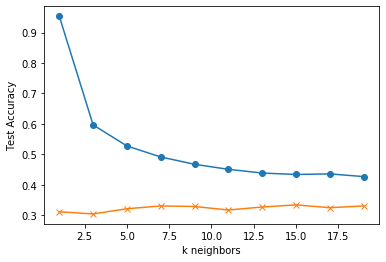

In [17]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Test Accuracy")
plt.show()

In [18]:
# Note that k: 17 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
print('k=15 Test Accuracy: %.3f' % knn.score(X_test, y_test))

k=15 Test Accuracy: 0.334
